# OpenCV框架与图像插值算法

## 简介 
&emsp;&emsp;在图像处理中，平移变换、旋转变换以及放缩变换是一些基础且常用的操作。这些几何变换并不改变图象的象素值，只是在图象平面上进行象素的重新排列。在一幅输入图象$[u，v]$中，灰度值仅在整数位置上有定义。然而，输出图象[x，y]的灰度值一般由处在非整数坐标上的$（u，v）$值来决定。这就需要插值算法来进行处理，常见的插值算法有最近邻插值、双线性插值和三次样条插值。

## 算法理论介绍与推荐

### 最近邻插值算法原理

&emsp;&emsp;最近邻插值，是指将目标图像中的点，对应到源图像中后，找到最相邻的整数点，作为插值后的输出。

![](imgs/20200412101740312.png)

&emsp;&emsp;如上图所示，目标图像中的某点投影到原图像中的位置为点P,此时易知，$f(P) = f(Q11)$.

**一个例子：**

&emsp;&emsp;如下图所示，将一幅3X3的图像放大到4X4，用$f(x, y)$表示目标图像，$h(x, y)$表示原图像，我们有如下公式：

$$
\begin{array}{c}
f(dst_{X}, dst_{Y}) = h(\frac{dst_{X}src_{Width}}  {dst_{Width}}, \frac{dst_{Y}src_{Height}} {dst_{Height}})
\end{array}
$$

$$
\begin{array}{c}
f(0,0)=h(0,0) \\
f(0,1)=h(0,0.75)=h(0,1) \\
f(0,2)=h(0,1.50)=h(0,2) \\
f(0,3)=h(0,2.25)=h(0,2) \\
...\\
\end{array}
$$

![](imgs/20200412101854853.png)

**缺点：**
用该方法作放大处理时，在图象中可能出现明显的块状效应

![](imgs/20200412102932888.png)

### 双线性插值

&emsp;&emsp;在讲双线性插值之前先看以一下线性插值，线性插值多项式为：

$$
f(x)=a_{1} x+a_{0}
$$

![](imgs/20200412103208674.png)

$$
y=y_{0}+\left(x-x_{0}\right) \frac{y_{1}-y_{0}}{x_{1}-x_{0}}=y_{0}+\frac{\left(x-x_{0}\right) y_{1}-\left(x-x_{0}\right) y_{0}}{x_{1}-x_{0}}
$$

&emsp;&emsp;双线性插值就是线性插值在二维时的推广,在两个方向上做三次线性插值，具体操作如下图所示：

![](imgs/2020041210201784.png)

&emsp;&emsp;令$f(x，y)$为两个变量的函数，其在单位正方形顶点的值已知。假设我们希望通过插值得到正方形内任意点的函数值。则可由双线性方程:
$$
f(x, y)=a x+b y+c x y+d
$$

&emsp;&emsp;来定义的一个双曲抛物面与四个已知点拟合。

&emsp;&emsp;首先对上端的两个顶点进行线性插值得：

$$
f(x, 0)=f(0,0)+x[f(1,0)-f(0,0)]
$$

&emsp;&emsp;类似地，再对底端的两个顶点进行线性插值有：
$$
f(x, 1)=f(0,1)+x[f(1,1)-f(0,1)]
$$

&emsp;&emsp;最后，做垂直方向的线性插值，以确定：

$$
f(x, y)=f(x, 0)+y[f(x, 1)-f(x, 0)]
$$

&emsp;&emsp;整理得：

$$
\begin{array}{l}
f(x, y)=[f(1,0)-f(0,0)] x+[f(0,1)-f(0,0)] y \\
+[f(1,1)+f(0,0)-f(0,1)-f(1,0)] x y+f(0,0)
\end{array}
$$


### 映射方法

**向前映射法**
		
&emsp;&emsp;可以将几何运算想象成一次一个象素地转移到输出图象中。如果一个输入象素被映射到四个输出象素之间的位置，则其灰度值就按插值算法在4个输出象素之间进行分配。称为向前映射法，或象素移交影射。

>注：从原图象坐标计算出目标图象坐标镜像、平移变换使用这种计算方法


**向后映射法**
		
&emsp;&emsp;向后映射法（或象素填充算法）是输出象素一次一个地映射回到输入象素中，以便确定其灰度级。如果一个输出象素被映射到4个输入象素之间，则其灰度值插值决定，向后空间变换是向前变换的逆。
>注：从结果图象的坐标计算原图象的坐标

- 旋转、拉伸、放缩可以使用
- 解决了漏点的问题，出现了马赛克

## 基于OpenCV的实现(Python)

**函数原型：**
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

**参数：**

| 参数 | 描述 |
|--|--|
| src | 【必需】原图像 |
| dsize | 【必需】输出图像所需大小 |
| fx | 【可选】沿水平轴的比例因子 |
| fy | 【可选】沿垂直轴的比例因子 |
| interpolation   | 【可选】插值方式 |

**插值方式：**

|  |  |
|--|--|
| cv.INTER_NEAREST | 最近邻插值 |
| cv.INTER_LINEAR | 双线性插值 |
| cv.INTER_CUBIC | 基于4x4像素邻域的3次插值法 |
| cv.INTER_AREA | 基于局部像素的重采样 |

通常，缩小使用cv.INTER_AREA，放缩使用cv.INTER_CUBIC(较慢)和cv.INTER_LINEAR(较快效果也不错)。默认情况下，所有的放缩都使用cv.INTER_LINEAR。

Original Dimensions :  (768, 1366, 3)
Resized Dimensions :  (230, 409, 3)
Resized image


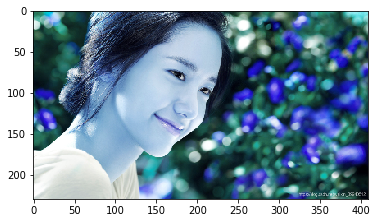

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/yun.jpg', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

scale_percent = 30       # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)

fx = 1.5
fy = 1.5

resized1 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation = cv2.INTER_NEAREST)

resized2 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation = cv2.INTER_LINEAR)
print('Resized Dimensions : ',resized.shape)

print("Resized image")
plt.imshow(resized)

INTER_NEAREST image


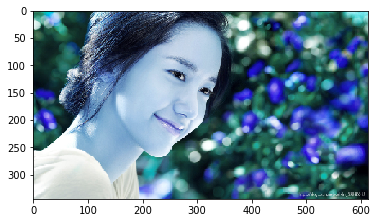

In [8]:
print("INTER_NEAREST image")
plt.imshow(resized1)

INTER_LINEAR image


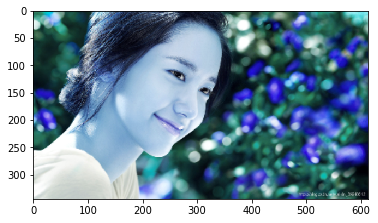

In [9]:
print("INTER_LINEAR image")
plt.imshow(resized2)